# Linear Models For Diamond Data set
***

## Abstract

<p>
    We will have a detailed look into the diamonds dataset to find relations ship between the dependent variable Price and other independent variables so that we can create regression models. We will start with a quick EDA to understand the data  and the correlarion among one another. Following that we will use Linear regression to create models for predicting `price` value based on various independent variables. We will also look for multi-colinearity and select variables according to the significance in a step wise manner. We will also compare one hot encoding with ordinal encoding. 
    Later we will look at Logistic regression models to clasify if a price is High or Low. We will look at the AUC for each model for comparison and the Log likelihood.
    At last we will also look at Lasso regression to see the effect of various alfa values over the RMSE of a model. We will compare that with a non regulazied model.
    Throughout the notebook we use cross validation for training and validating the models  
    Overall the objective will be to explore various Regression models.
</p>

## Index

1. [Exploring and Analyzing Data](#Exploring-and-Analyzing-Data)
2. [Univariate Analysis](#Univariate-Analysis)
3. [Multivariate Analysis](#Multivariate-Analysis)
4. [Conclusion](#Conclusion)
5. [Contributions](#Contributions)
6. [Citations](#Citations)
7. [License](#License)

### Importing libraries 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
mplstyle.use(['dark_background', 'ggplot', 'fast'])
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from IPython.display import Latex
from IPython.core.display import display, HTML
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import KFold

loading diamonds dataset

In [2]:
original_df = pd.read_csv("diamonds.csv",index_col=0)

verifying if was data loaded correctly

In [3]:
original_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Exploring details about the data set

In [4]:
original_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.9+ MB


In [6]:
original_df.shape

(53940, 10)

In [7]:
original_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

##### Observation 1:
1. The data size is 10 columns and 53940 rows 
2. There are no null/ empty values for any columns

#### Field details

<table class="table table-striped table-bordered">
    <thead>
        <tr>
            <th style="text-align:left">Column Name</th>
            <th style="text-align:left">Type of field</th>
            <th style="text-align:left">Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align:left">carat</td>
            <td style="text-align:left">Continuous</td>
            <td style="text-align:left">weight of the diamond (0.2 to 5.01)</td>
        </tr>
        <tr>
            <td style="text-align:left">cut</td>
            <td style="text-align:left">Categorical</td>
            <td style="text-align:left">quality of the cut (Fair, Good, Very Good, Premium, Ideal)</td>
        </tr>
        <tr>
            <td style="text-align:left">color</td>
            <td style="text-align:left">Categorical</td>
            <td style="text-align:left">diamond colour (J (worst) to D (best))</td>
        </tr>
        <tr>
            <td style="text-align:left">clarity</td>
            <td style="text-align:left">Categorical</td>
            <td style="text-align:left">a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))</td>
        </tr>
        <tr>
            <td style="text-align:left">depth</td>
            <td style="text-align:left">Continuous</td>
            <td style="text-align:left">total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 to 79)</td>
        </tr>
        <tr>
            <td style="text-align:left">table</td>
            <td style="text-align:left">Continuous</td>
            <td style="text-align:left">width of top of diamond relative to widest point (43 to 95)</td>
        </tr>
        <tr>
            <td style="text-align:left">price</td>
            <td style="text-align:left">Continuous</td>
            <td style="text-align:left">price in US dollars (\$326 to \$18,823)</td>
        </tr>
        <tr>
            <td style="text-align:left">x</td>
            <td style="text-align:left">Continuous</td>
            <td style="text-align:left">length in mm (0 to 10.74)</td>
        </tr>
        <tr>
            <td style="text-align:left">y</td>
            <td style="text-align:left">Continuous</td>
            <td style="text-align:left">width in mm (0 to 58.9)</td>
        </tr>
        <tr>
            <td style="text-align:left">z</td>
            <td style="text-align:left">Continuous</td>
            <td style="text-align:left">depth in mm (0 to 31.8)</td>
        </tr>
    </tbody>
</table>

## Convert categorical variables 

There are three categorical variables that can be encoded for preforming regression

In [8]:
original_df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
original_df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
original_df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

The categorical variables are ordinal in nature so we can swap them with integers in an ascending fashion.
1. cut -> Fair: 1 and Ideal: 5
2. color -> J: 1 and D: 7
3. clarity -> I1: 1 and IF: 8

In [11]:
replace_dict = {
    "cut": {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5},
    "color":{'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7},
    "clarity":{'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
}
original_df.replace(replace_dict,inplace = True)

verifing the substitutions

In [12]:
original_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


Visualizing distributions for the data fields using box plots

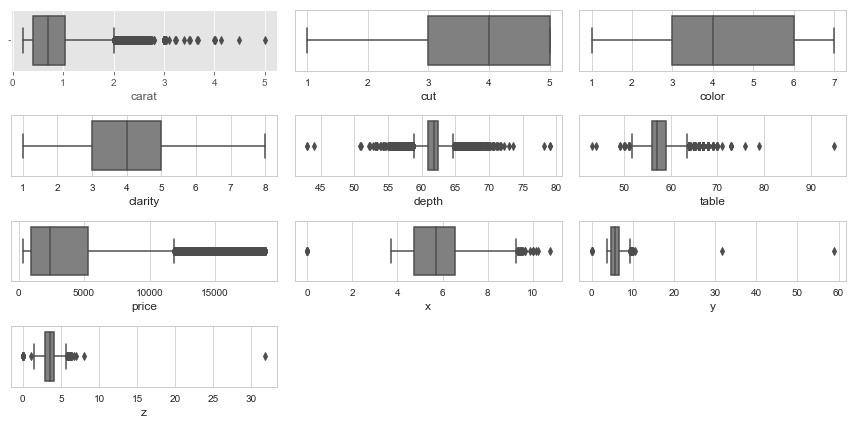

In [13]:
col_values = original_df.columns.values
cols = 3
rows = (len(col_values)-1)/cols
plt.figure(figsize=(cols*4,rows*2))
for i in range(0,len(col_values)):
    plt.subplot(rows + 1,cols,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(original_df[col_values[i]],color='grey',orient='h')
    plt.tight_layout()

Checking the relational tendencies between all the fields

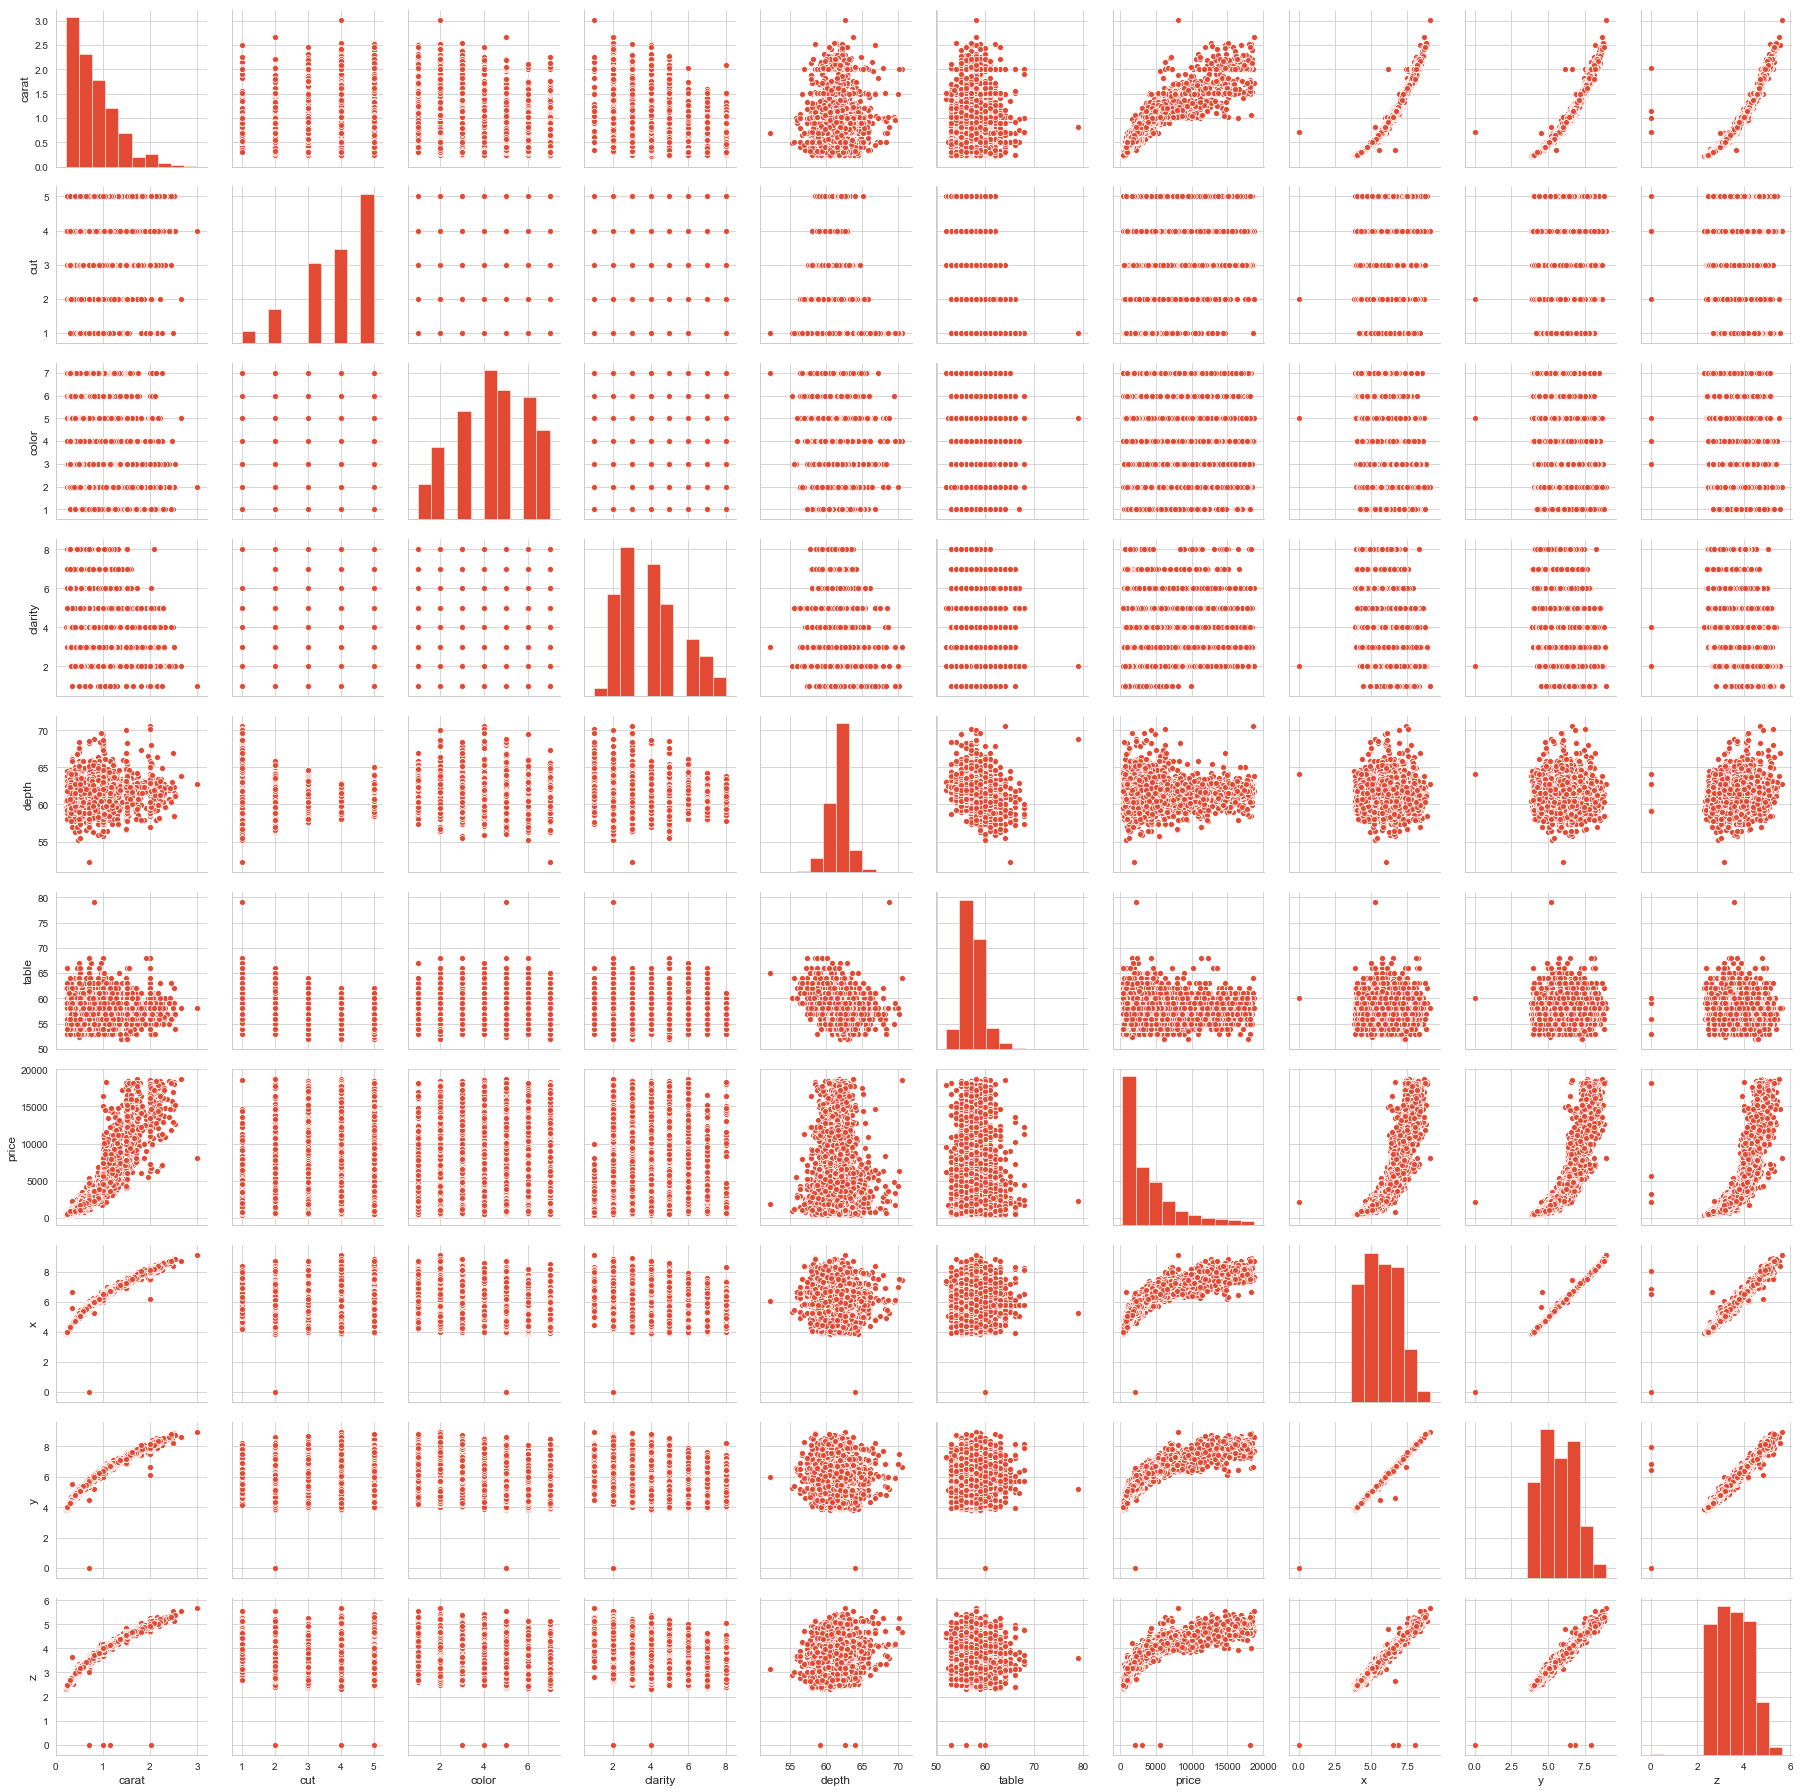

In [14]:
sns.pairplot(original_df.sample(frac=0.1,random_state=1))

#### Observation 2:
1. There seems to be a linear relarion between carat and x, y and z
2. Price has a strong positive relation with carat, x, y, z  

Visualizing the co-relation among the fields with coorelation matrix and heat map 

In [15]:
def plotHeatMap(dataFrame,vmax):
    """
    Plots a heatmap of correlation between data.
    
    Args:
        dataFrame: A pandas data frame for which the heatmap needs to be plotted.
    
    Return:
        This function returns nothing but plots a heatmap.
    """
    
    plt.figure(figsize=(16,12))
    corr = dataFrame.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(data=corr,annot=True,mask=mask,fmt='.2f',vmax=vmax,cmap='coolwarm',square=True)
    plt.xticks(rotation=90)
    plt.show()
    


In [16]:
original_df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


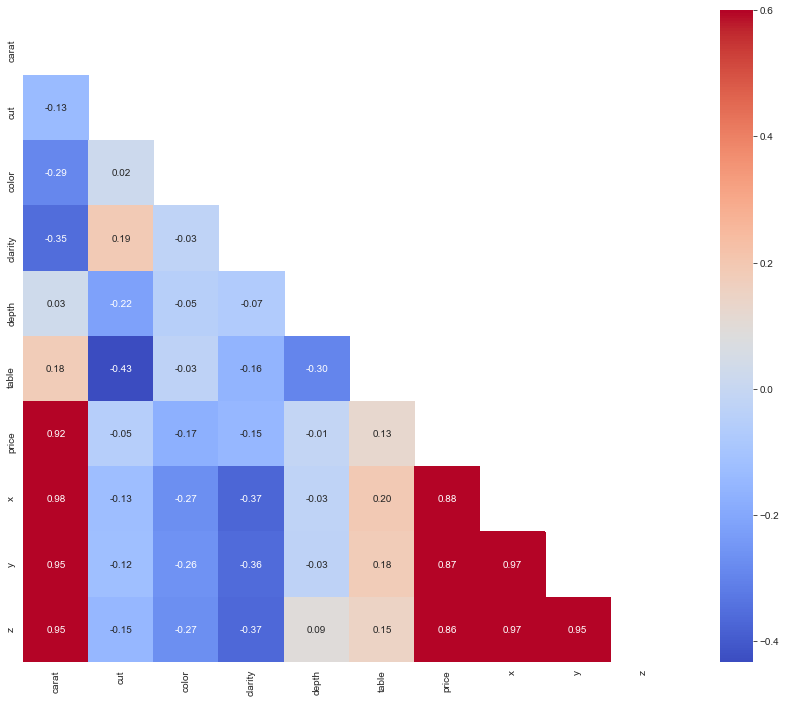

In [17]:
plotHeatMap(original_df,0.6)

##### Observation 3:
1. Corelation matrix also shows the same strong relation between price and x,y,z and carat
2. cut and table also seem to be co-related.
3. There is a week relation between clarity and carat

Visualizing a linear relation of price and other independent variables

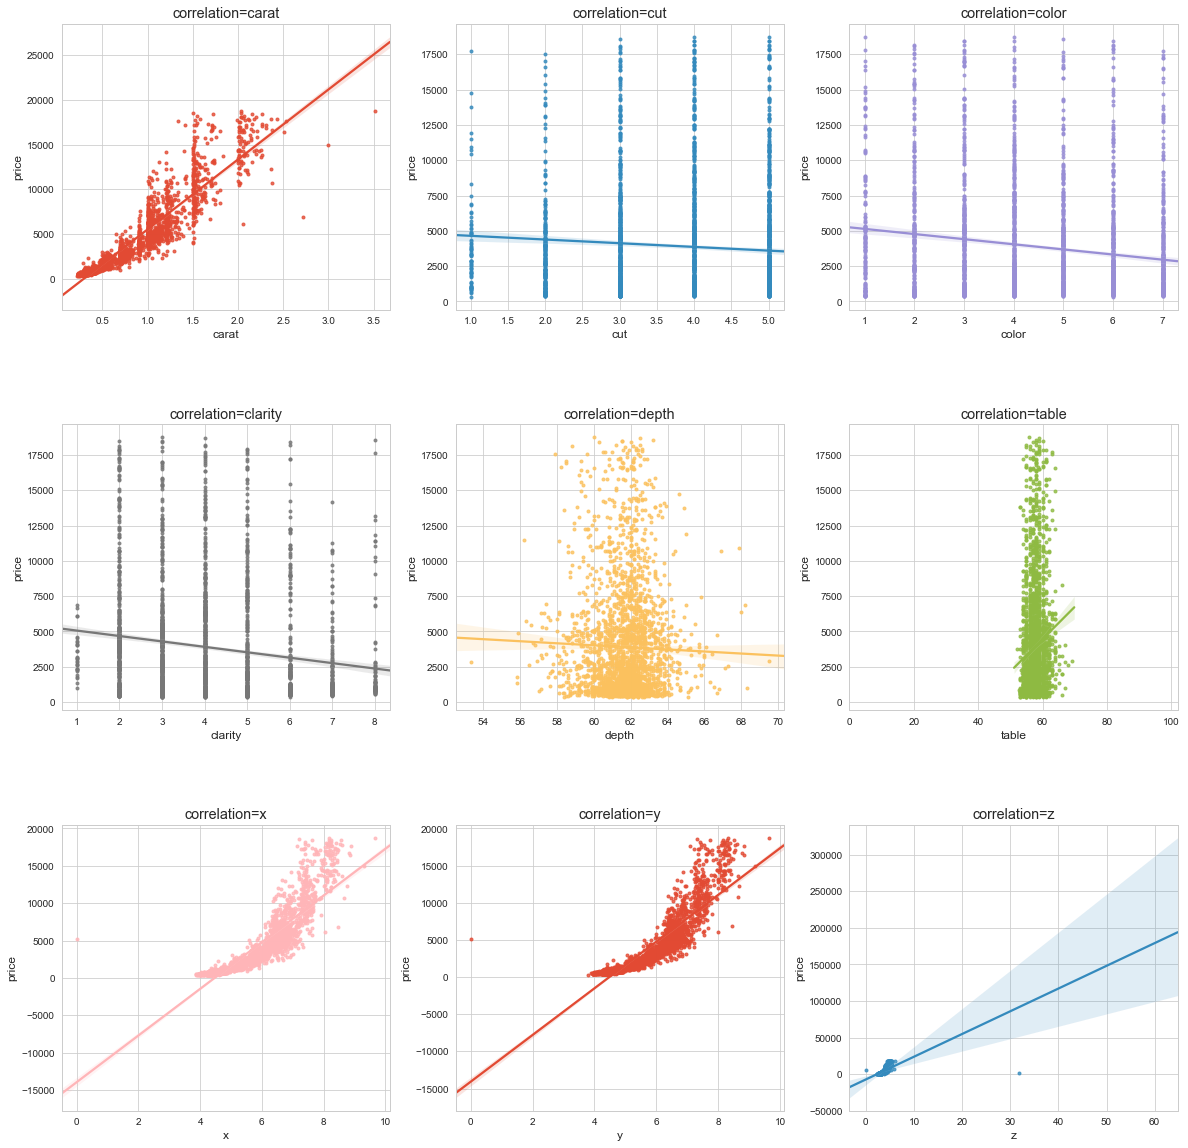

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

x_cols = ['carat','cut','color','clarity','depth','table','x','y','z']

for i in range(3):
    for j in range(3):
        sns.regplot(x=x_cols[i*3+j], y='price', data=original_df.sample(random_state=100,frac=0.05),
                   ax=axes[i,j], marker='.')
        title = 'correlation='+str(x_cols[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

Converting table to a binary variable by replacing value 1 if value is greater than the mean else with 0.(As per Assignment requirement)

In [19]:
df_linear = original_df.copy(deep=True)
mean_table = df_linear['table'].mean()
df_linear.loc[df_linear['table'] < mean_table,'table'] = 0
df_linear.loc[df_linear['table'] >= mean_table,'table'] = 1
df_linear.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,0.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,1.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,1.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,1.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,1.0,335,4.34,4.35,2.75


Defining a funtion for creating test train splits and then training a model with the training data and then returing a dictionary with all the relavant data. 

In [20]:
def get_reg_model(dataframe, split, rnd_state,model_name,y_column,X_columns=None):
    """Gererates a regression model for a given data frame and its independent and dependent variables.

    Args:
      dataframe: Datase t for which regression model is to be generated
      X_columns: Column names of independent variables
      y_column: Column name of dependent variable
      split: Test train split
      rnd_state: seed for random number generator
      
    Returns:
      regr: Regression model
      X_train: Independent variable data which was used for fitting the model 
      X_test: Independent variable data which can be used for testing the model
      y_train: Dependent variable data which was used for fitting the model 
      y_test: Dependent variable data which can be used for testing the model
        
    """
    X = dataframe.loc[:,dataframe.columns != str(y_column)] if X_columns == None else dataframe[X_columns]
    y = dataframe[y_column]

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split,random_state =rnd_state)

    regr = LinearRegression()
    regr.fit(X_train,y_train)
    
    pred_y = regr.predict(X_test)
    
    score = regr.score(X_test, y_test)
    print("Score: {}".format(score))
    
    return {"model":regr,
            "model_name":model_name,
            "score": score,
            "train_data":{"X":X_train,"y":y_train},
            "test_data":{"X":X_test,"y":y_test},
            "pred_y":pred_y}

Defining a function that prints the linear equation for the given model 

In [21]:
def get_reg_eq_latex(model_name, regr_model,columns_list):
    """Gererates a regression model for a given data frame and its independent and dependent variables.

    Args:
      regr_model: Regression Model
      columns: Columns 
      
    Returns:
      eq: Regression equation string
    """
    intercept = regr_model.intercept_[0]
    eq = model_name+": "+"y = " + "{:.2f}".format(intercept) +" "
    for idx, col_name in enumerate(columns_list.columns):
        eq = eq + ("+ " if regr_model.coef_[0][idx] > 0  else "") + "{:.2f}".format(regr_model.coef_[0][idx])+"X_{"+("{}".format(idx+1))+"} "
        

    return eq

Defining a Leader Board to store the models and its related info.

In [22]:
class Leader_Board:
    """
        This is a container for the linear models generated.
        This provids a convenient way to access and summarize all the generated models.
    """
    
    
    # A dictionary of models 
    # Model nake is the key and the dictionar returned by function get_reg_model is the value
    reg_models = {}
    
    #stores the best model based on the R2 score
    best_model = None
    
    def add_model(self,reg_model):
        """
            Args:
              regr_model: Name of the regression model 

            Returns:
              None
        """
        reg_model["summary_model"] = self.get_reg_model_summary(reg_model["train_data"]["X"],reg_model["train_data"]["y"])
        
        self.reg_models[reg_model['model_name']] = reg_model
        if self.best_model == None:
            self.best_model = reg_model
        elif self.best_model['score'] < reg_model['score']:
            self.best_model = reg_model
            
    def get_model(self,model_name):
        """
            Args:
                regr_model: Name of the regression model 

            Returns:
                the a dictionary with all the relavent info for a model.
                "model": Linear Regression model
                "model_name": Name of the model
                "score": R2 score
                "train_data":{"X":X_train,"y":y_train},
                "test_data":{"X":X_test,"y":y_test}
        """
        return self.reg_models[model_name]
    
    def get_pred_vs_actual(self,model_name):
        model = self.get_model(model_name)
        plt.scatter(model['test_data']['y'], model['pred_y'])
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        
    def get_best_model(self):
        """
            Args:
              regr_model: Name of the regression model 

            Returns:
              the a dictionary with all the relavent info for a model.
        """
        return self.best_model
    
    def get_all_models(self):
        """
            Args:
              None

            Returns:
              List of dictionary with all the relavent info for a model.
        """
        return self.reg_models
    
    def get_reg_model_summary(self, X,y):  
        """
            Args:
              X: Data frame with the independent variables
              y: Data frame with the dependent variable

            Returns:
              List of dictionary with all the relavent info for a model.
        """
        X_ = sm.add_constant(X.copy())
        ols = sm.OLS(y, X_)
        reg_model = ols.fit()
        return reg_model
    
    def calculate_vif(self,model_name):
        """
            Args:
              regr_model: Name of the regression model 

            Returns:
              View VIF for a model
        """
        vif = pd.DataFrame()
        X = self.get_model(model_name)['train_data']['X']
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif["features"] = X.columns
        vif = vif.sort_values(by=['VIF'], ascending=False)
        return vif.reset_index()

    def get_model_summary(self,model_name):
        """
            Args:
              regr_model: Name of the regression model 

            Returns:
              List of dictionary with all the relavent info for a model.
        """
        return self.get_model(model_name)["summary_model"].summary()        
        
    def show_error_distribution(self,model_name):
        """
            Args:
              regr_model: Name of the regression model 

            Returns:
              Plot error distribution plot
        """
        X = self.get_model(model_name)['test_data']['X']
        y = self.get_model(model_name)['test_data']['y']
        predicted_y = self.get_model(model_name)['model'].predict(X)
        errors = predicted_y - y
        fig,ax = plt.subplots(2)
        sns.distplot(errors,ax=ax[0])
        sns.boxplot(errors,color='grey',orient='h',ax=ax[1])
        
    def show_qq_plot(self,model_name):
        """
            Args:
              regr_model: Name of the regression model 

            Returns:
              Plots qq plot
        """
        res = self.get_model(model_name)['summary_model'].resid # residuals
        fig = sm.qqplot(res, stats.t, distargs=(4,),line = 'q')
        
    def get_rmse(self,model_name):
        """
            Args:
              regr_model: Name of the regression model 

            Returns:
              return rmse
        """
        model = self.get_model(model_name)
        reg_model = model['model']
        test_y = model['test_data']['y']
        test_X = model['test_data']['X']
        pred_y = reg_model.predict(test_X)
        rmse = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
        return rmse
        
    def cross_val_train(self,model_name,folds,data,reg_type):
        """
            Args:
                regr_model: Name of the regression model 
                folds: number of folds
                data: data for cross validation
                reg_type: regression type
            Returns:
                RMSE and adj R2 calculated after cross validation.
        """
        kf = KFold(n_splits=folds, random_state=4, shuffle=True)
        model = leader_board.get_model(model_name)
        X = data[model['test_data']['X'].columns.values]
        y = data[model['test_data']['y'].columns.values]
        
        adj_r2 = []
        rmse = []
        for train,test in kf.split(data):
            X_train, y_train = X.iloc[train], y.iloc[train]
            X_test, y_test = X.iloc[test], y.iloc[test]
            reg = reg_type
            reg.fit(X_train,y_train)
            rmse.append(np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))))
            adj_r2.append(self.get_reg_model_summary(X_train, y_train).rsquared_adj)
        model['rmse'] = np.mean(rmse)
        model['adj_r2'] = np.mean(adj_r2) 
        return model['rmse'],model['adj_r2']
        
    def cross_val_model(self,model_name,data,folds):
        """
            Args:
                regr_model: Name of the regression model 
                folds: number of folds
                data: data for cross validation
                reg_type: regression type
            Returns:
              Plot error distribution plot
        """
        model = leader_board.get_model(model_name)

        X = data[model['test_data']['X'].columns.values]
        y = data[model['test_data']['y'].columns.values]

        cv = KFold(n_splits=folds, random_state=4, shuffle=True)

        scores = cross_val_score(model['model'],X,y,cv = cv)
        print(scores)
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        
        
    def show_comparison(self):
        """
            Args:
                regr_model: Name of the regression model 
                folds: number of folds
                data: data for cross validation
                reg_type: regression type
            Returns:
              Tabular comparison of models
        """
        output = """
        <table>
            <tr>
                <th>Model Name</th>
                <th>R-squared</th>
                <th>Adj. R-squared(Cross Validated)</th>
                <th>AIC</th>
                <th>BIC</th>
                <th>RMSE(Cross Validated)</th>
            </tr>
            {}
        </table>
        """
        
        rows = """"""
        for n,m in self.reg_models.items():
            reg_model = m['summary_model']
            row = """
            <tr>
                <td>{}</td>
                <td>{}</td>
                <td>{}</td>
                <td>{}</td>
                <td>{}</td>
                <td>{}</td>
            </tr>
            """.format(n,reg_model.rsquared,m['adj_r2'],reg_model.aic,reg_model.bic,m['rmse'])
            rows = rows + row
        
        display(HTML(output.format(rows)))

In [23]:
leader_board = Leader_Board()

##### Model 1
Training a Linear model with </br>
Independent variables: `cut`,`color`,`clarity`,`carat`,`table`,`x`,`y`,`z`,`depth` </br>
Test split  : `0.75`

In [24]:
leader_board.add_model(get_reg_model(df_linear,0.75,100,"V1",['price'],['cut','color','clarity','carat','table','x','y','z','depth']))

Score: 0.9076923820314616


Cross validating the model V1 with 5 folds 

In [25]:
rmse, adj_r2 = leader_board.cross_val_train('V1',5,df_linear,LinearRegression())
print("RMSE: {}\nADJ-R2: {}".format(rmse, adj_r2))

RMSE: 1218.631226130254
ADJ-R2: 0.906865281532254


View Model summary for model V1 

In [26]:
leader_board.get_model_summary("V1")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.404e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:09:00   Log-Likelihood:            -1.1535e+05
No. Observations:               13485   AIC:                         2.307e+05
Df Residuals:                   13475   BIC:                         2.308e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -314.6077    808.964     -0.389      0.697   -1900.290    1271.075
cut          163.3937     11.352     14.394      0.000     141.143     185.645
color        333.4066      6.730     49.538      0.000     320.214     346.599
clarity      526.2560      7.278     72.307      0.000     511.990     540.522
carat       1.094e+04    114.024     95.951      0.000    1.07e+04    1.12e+04
table          3.2931     25.518      0.129      0.897     -46.727      53.313
x           -878.8989     92.604     -9.491      0.000   -1060.416    -697.382
y              0.2555     23.798      0.011      0.991     -46.392      46.903
z            -41.2769    138.574     -0.298      0.766    -312.902     230.348
depth        -56.9714     11.867     -4.801      0.000     -80.232     -33.711
==============================================================================
Omnibus:                     3053.669   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151353.328
Skew:                          -0.122   Prob(JB):                         0.00
Kurtosis:                      19.411   Cond. No.                     4.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observation 4:
1. Adj. R- Square is 0.904
2. AIC is 2.307e+05
3. BIC is 2.308e+05
4. Multi-coleniarity seems to exist 
5. z has a p value of 0.766
6. y has a p value of 0.991
7. table has a p value of 0.897
8. Carat is highly significant as it has the highest t statistics
9. Clarity, color are also significant

##### Model 2
Removing columns z, y and table as ther have a large p values
Training a Linear model with </br>
Independent variables: `cut`,`color`,`clarity`,`carat`,`x`,`depth` </br>
Test split  : `0.75`

In [27]:
leader_board.add_model(get_reg_model(df_linear,0.75,100,"V2",['price'],['cut','color','clarity','carat','x','depth']))

Score: 0.9076951893934395


Cross validating the model V2 with 5 folds 

In [28]:
rmse, adj_r2 = leader_board.cross_val_train('V2',5,df_linear,LinearRegression())
print("RMSE: {}\nADJ-R2: {}".format(rmse, adj_r2))

RMSE: 1217.7569430482756
ADJ-R2: 0.9068514486700197


View Model summary for model V2 

In [29]:
leader_board.get_model_summary("V2")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 2.107e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:09:01   Log-Likelihood:            -1.1535e+05
No. Observations:               13485   AIC:                         2.307e+05
Df Residuals:                   13478   BIC:                         2.308e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -135.9117    589.517     -0.231      0.818   -1291.447    1019.623
cut          162.7091     10.129     16.064      0.000     142.855     182.563
color        333.3929      6.728     49.553      0.000     320.205     346.581
clarity      526.1355      7.261     72.457      0.000     511.902     540.369
carat       1.094e+04    113.797     96.153      0.000    1.07e+04    1.12e+04
x           -904.2764     48.313    -18.717      0.000    -998.978    -809.575
depth        -59.7892      8.020     -7.455      0.000     -75.510     -44.068
==============================================================================
Omnibus:                     3055.555   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151645.756
Skew:                          -0.123   Prob(JB):                         0.00
Kurtosis:                      19.427   Cond. No.                     3.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking VIF for Multi-colinearity

In [30]:
leader_board.calculate_vif('V2')

,index,VIF,features
0,4,477.586600,x
1,5,226.263795,depth
2,3,70.853596,carat
3,0,13.752837,cut
4,1,8.557832,color
5,2,8.367887,clarity


#### Observation 5:
1. Adj. R- Square is 0.907
2. AIC is 2.307e+05
3. BIC is 2.308e+05
4. Multi-coleniarity seems to exist 
5. x and depth have a high VIF which suggests that thwy have high multi- colinearity

##### Model 3
Removing columns x and depth as ther have a large p values
Training a Linear model with </br>
Independent variables: `cut`,`color`,`clarity`,`carat` </br>
Test split  : `0.75`

In [31]:
leader_board.add_model(get_reg_model(df_linear,0.75,100,"V3",['price'],['cut','color','clarity','carat']))

Score: 0.9050102100613566


In [32]:
rmse, adj_r2 = leader_board.cross_val_train('V3',5,df_linear,LinearRegression())
print("RMSE: {}\nADJ-R2: {}".format(rmse, adj_r2))

RMSE: 1234.916136979757
ADJ-R2: 0.9041637268912197


In [33]:
leader_board.get_model_summary("V3")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 3.070e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:09:01   Log-Likelihood:            -1.1553e+05
No. Observations:               13485   AIC:                         2.311e+05
Df Residuals:                   13480   BIC:                         2.311e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7435.4290     68.310   -108.848      0.000   -7569.326   -7301.532
cut          166.4889     10.066     16.541      0.000     146.759     186.219
color        327.9688      6.801     48.224      0.000     314.638     341.300
clarity      547.6864      7.263     75.413      0.000     533.451     561.922
carat       8868.1003     25.990    341.209      0.000    8817.156    8919.045
==============================================================================
Omnibus:                     2644.989   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55870.339
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                      12.943   Cond. No.                         48.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
leader_board.calculate_vif('V3')

,index,VIF,features
0,0,10.010143,cut
1,2,6.276106,clarity
2,1,5.578741,color
3,3,2.924538,carat


#### Observation 6:
1. Adj. R- Square is 0.904
2. AIC is 2.311e+05
3. BIC is 2.311e+05
4. Multi-coleniarity has been removed sufficiently.

### Trying model by One Hot 

In [35]:
def do_one_hot_encoding(dataframe, cols, remove_cols):
    """
        Args:
            dataframe: dataframe which needs to be converted to one hot encoding 
            cols: columns for one hot encoding
            remove_cols: should the columns be dropped 
        Returns:
          dataframe: data frame with one hot coding
    """
    for col in cols:
        enc_data = pd.get_dummies(dataframe[col],prefix = col)
        dataframe = pd.concat([dataframe,enc_data],axis=1)
        if remove_cols:
            dataframe.drop(columns=col)
    
    return dataframe

In [36]:
df_encoded = original_df.copy(deep = True)

`cut`, `color`, `clarity` are categorical fields that need to be one hot encoded

In [37]:
df_encoded = do_one_hot_encoding(df_encoded,['cut','color','clarity'],True)

In [38]:
df_encoded.iloc[:,:10].head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [39]:
df_encoded.iloc[:,10:].head()

,cut_1,cut_2,cut_3,cut_4,cut_5,color_1,color_2,color_3,color_4,color_5,color_6,color_7,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,clarity_8
1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [40]:
leader_board.add_model(get_reg_model(df_encoded,0.75,100,"V4",['price'],[i for i in df_encoded.loc[:, ~df_encoded.columns.isin(['cut','clarity','color','x','y','z','price'])].columns.values]))

Score: 0.916721281054437


In [41]:
leader_board.cross_val_train('V4',5,df_encoded,LinearRegression())

(1156.617995706158, 0.9160204968454909)

In [42]:
leader_board.get_model_summary('V4')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     7090.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:09:04   Log-Likelihood:            -1.1464e+05
No. Observations:               13485   AIC:                         2.293e+05
Df Residuals:                   13464   BIC:                         2.295e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1231.0605    503.002     -2.447      0.014   -2217.015    -245.106
carat       8969.0413     24.726    362.735      0.000    8920.575    9017.508
depth        -11.2997      8.333     -1.356      0.175     -27.634       5.034
table        -21.6724      6.178     -3.508      0.000     -33.782      -9.563
cut_1       -927.5839    127.782     -7.259      0.000   -1178.055    -677.113
cut_2       -270.6261    108.358     -2.498      0.013    -483.023     -58.229
cut_3        -52.4054    100.210     -0.523      0.601    -248.830     144.019
cut_4        -35.6824     99.489     -0.359      0.720    -230.695     159.330
cut_5         55.2373     89.951      0.614      0.539    -121.078     231.553
color_1    -1720.1963     83.166    -20.684      0.000   -1883.212   -1557.180
color_2     -767.4353     78.264     -9.806      0.000    -920.844    -614.027
color_3     -357.5829     76.641     -4.666      0.000    -507.809    -207.356
color_4      154.9425     74.833      2.071      0.038       8.260     301.625
color_5      388.9390     74.815      5.199      0.000     242.292     535.586
color_6      446.8315     75.290      5.935      0.000     299.252     594.411
color_7      623.4410     76.553      8.144      0.000     473.386     773.496
clarity_1  -3968.7587    104.412    -38.011      0.000   -4173.421   -3764.097
clarity_2  -1386.2373     68.929    -20.111      0.000   -1521.348   -1251.126
clarity_3   -415.9468     68.199     -6.099      0.000    -549.627    -282.267
clarity_4    257.0125     67.544      3.805      0.000     124.616     389.409
clarity_5    602.2236     67.779      8.885      0.000     469.367     735.080
clarity_6   1038.6909     69.846     14.871      0.000     901.783    1175.599
clarity_7   1113.0472     72.546     15.343      0.000     970.847    1255.247
clarity_8   1528.9082     80.913     18.896      0.000    1370.308    1687.509
==============================================================================
Omnibus:                     3712.595   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40533.852
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                      11.251   Cond. No.                     1.24e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.2e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
leader_board.calculate_vif('V4')

c:\users\pc\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,index,VIF,features
0,11,inf,color_4
1,12,inf,color_5
2,21,inf,clarity_7
3,20,inf,clarity_6
4,19,inf,clarity_5
5,18,inf,clarity_4
6,17,inf,clarity_3
7,16,inf,clarity_2
8,15,inf,clarity_1
9,14,inf,color_7


### Comparing Models

View all the equations for linear models

In [44]:
eq = r"\[ "
for name,model in leader_board.get_all_models().items():
    test_data = model['train_data']['X']
    eq = eq + get_reg_eq_latex(name,model['model'],test_data)+"\\\\"

eq = eq + " \]"
    
Latex(eq)

<IPython.core.display.Latex object>

Show comparison of models generated so far

In [45]:
leader_board.show_comparison()

Model Name,R-squared,Adj. R-squared(Cross Validated),AIC,BIC,RMSE(Cross Validated)
V1,0.9036478066454166,0.906865281532254,230722.64531765413,230797.73865000985,1218.631226130254
V2,0.9036469322528281,0.9068514486700197,230716.7676929747,230769.33302562372,1217.7569430482756
V3,0.9010964957111743,0.9041637268912197,231065.06920656475,231102.6158727426,1234.916136979757
V4,0.9132863549640282,0.9160204968454909,229323.34107759202,229481.03707553906,1156.617995706158


Plotting error distributions for V1, V2, V3, V4 to see if the errors are normaly distributred

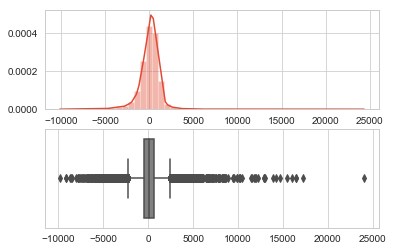

In [46]:
leader_board.show_error_distribution('V1')

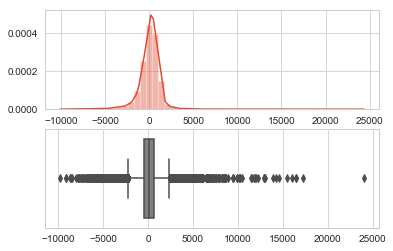

In [47]:
leader_board.show_error_distribution('V2')

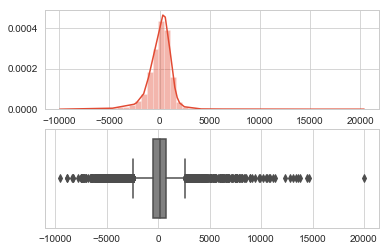

In [48]:
leader_board.show_error_distribution('V3')

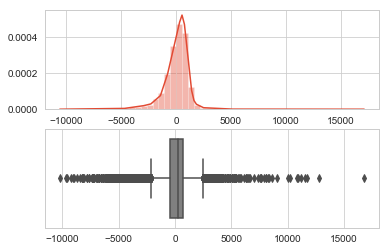

In [49]:
leader_board.show_error_distribution('V4')

#### Observation 7:
For the models V1, V2, V3 and V4 the errors seem to be distributed normaly

Plotting QQ plots to check for homoscedasticity for V1, V2, V3, V4

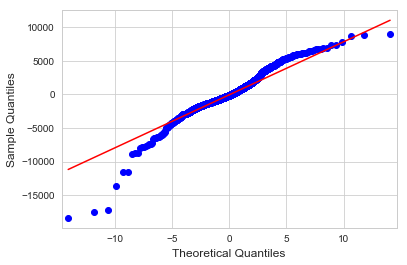

In [50]:
leader_board.show_qq_plot('V1')

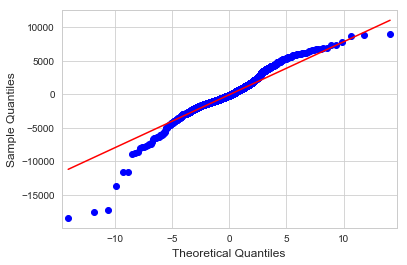

In [51]:
leader_board.show_qq_plot('V2')

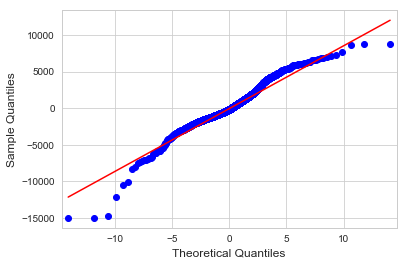

In [52]:
leader_board.show_qq_plot('V3')

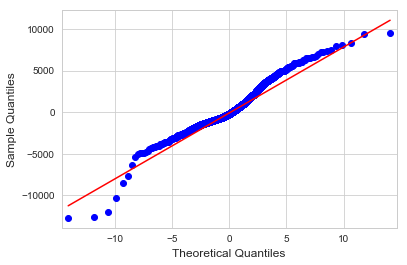

In [53]:
leader_board.show_qq_plot('V4')

#### Observation 8:
All the models have a tighter fit to the quartiles line but the V3 and V4 seems to have a much linear fit

Ploting Actual Vs Predicted Values

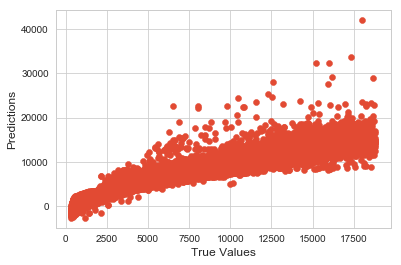

In [54]:
leader_board.get_pred_vs_actual('V1')

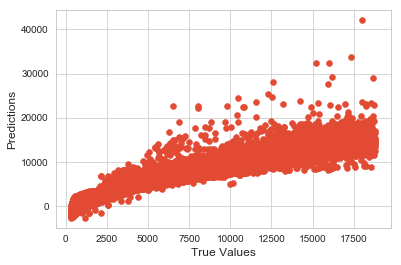

In [55]:
leader_board.get_pred_vs_actual('V2')

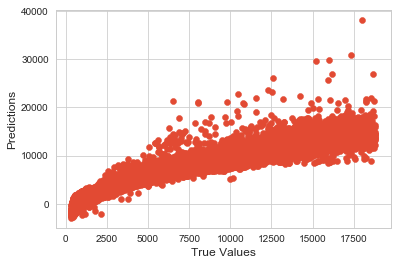

In [56]:
leader_board.get_pred_vs_actual('V3')

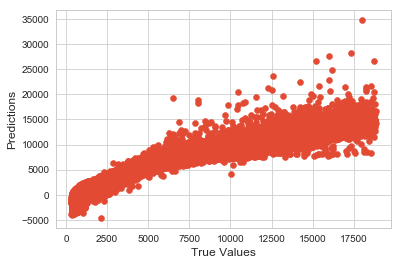

In [57]:
leader_board.get_pred_vs_actual('V4')

#### Observation 9:
1. Model 3 and 4 has a fairly linear. i.e to say that the values predicted are fairly close to the actuals
2. All the models are predicting some negative value for price. This is because it is a linear eqation and the value for y can go below zero. We can take the natural log to avoid this.

## Interaction Effect

Here we create an interaction variable called Volume based on table and depth to see if there is any synergistic effect

In [58]:
df_interaction = df_linear.copy(deep=True)
df_interaction['volume'] = df_interaction['depth']*df_interaction['table']
df_interaction.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
1,0.23,5,6,2,61.5,0.0,326,3.95,3.98,2.43,0.0
2,0.21,4,6,3,59.8,1.0,326,3.89,3.84,2.31,59.8
3,0.23,2,6,5,56.9,1.0,327,4.05,4.07,2.31,56.9
4,0.29,4,2,4,62.4,1.0,334,4.20,4.23,2.63,62.4
5,0.31,2,1,2,63.3,1.0,335,4.34,4.35,2.75,63.3


In [59]:
leader_board.add_model(get_reg_model(df_interaction,0.75,100,"V5",['price'],[i for i in df_interaction.loc[:, ~df_interaction.columns.isin(['price'])].columns.values]))

Score: 0.9076739775613977


In [60]:
leader_board.cross_val_train('V5',5,df_interaction,LinearRegression())

(1218.7002410238583, 0.9068642784247917)

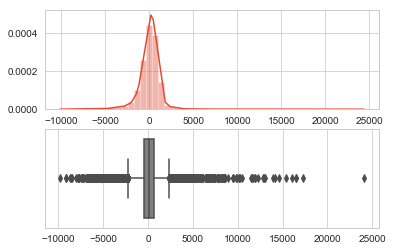

In [61]:
leader_board.show_error_distribution('V5')

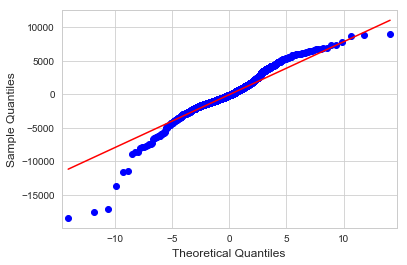

In [62]:
leader_board.show_qq_plot('V5')

Here we create a new interaction field volume of x, y, z

In [63]:
df_interaction['volume'] = df_interaction['x']*df_interaction['y']*df_linear['z']
df_interaction.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
1,0.23,5,6,2,61.5,0.0,326,3.95,3.98,2.43,38.202030
2,0.21,4,6,3,59.8,1.0,326,3.89,3.84,2.31,34.505856
3,0.23,2,6,5,56.9,1.0,327,4.05,4.07,2.31,38.076885
4,0.29,4,2,4,62.4,1.0,334,4.20,4.23,2.63,46.724580
5,0.31,2,1,2,63.3,1.0,335,4.34,4.35,2.75,51.917250


In [64]:
leader_board.add_model(get_reg_model(df_interaction,0.75,100,"V6",['price'],[i for i in df_interaction.loc[:, ~df_interaction.columns.isin(['price'])].columns.values]))

Score: 0.9078506758107039


In [65]:
leader_board.cross_val_train('V6',5,df_interaction,LinearRegression())

(1265.9603110367211, 0.9072791360614769)

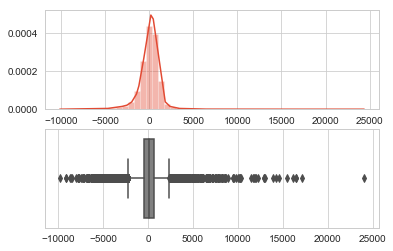

In [66]:
leader_board.show_error_distribution('V6')

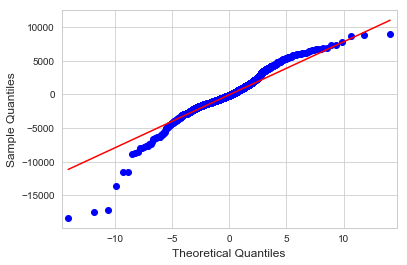

In [67]:
leader_board.show_qq_plot('V6')

#### Observation 10
In both cases of adding the interaction variable there does not seem to be any significant synergistic effect.


Below we see the comparison of all the linear models

In [68]:
leader_board.show_comparison()

Model Name,R-squared,Adj. R-squared(Cross Validated),AIC,BIC,RMSE(Cross Validated)
V1,0.9036478066454166,0.906865281532254,230722.64531765413,230797.73865000985,1218.631226130254
V2,0.9036469322528281,0.9068514486700197,230716.7676929747,230769.33302562372,1217.7569430482756
V3,0.9010964957111743,0.9041637268912197,231065.06920656475,231102.6158727426,1234.916136979757
V4,0.9132863549640282,0.9160204968454909,229323.34107759202,229481.03707553906,1156.617995706158
V5,0.9036574565039285,0.9068642784247917,230723.29470118927,230805.89736678058,1218.7002410238583
V6,0.9036981436538409,0.9072791360614769,230717.5985457321,230800.2012113234,1265.9603110367211


In [69]:
leader_board.get_best_model()['model_name']

'V4'

#### Observation 11: 
1. Based on the Adj R- squared value V4 seems to be the best model out of the other generated models

## Logistic Regression

Below is a container for storing the logistic regression models that we will generate

In [70]:
class Leader_board_logistic(Leader_Board):
    
    reg_models = {}
    best_model = None
    
    def add_model(self,reg_model):
        self.reg_models[reg_model['model_name']] = reg_model
        if self.best_model == None:
            self.best_model = reg_model
        elif self.best_model['auc'] < reg_model['auc']:
            self.best_model = reg_model
            
    
    def get_confussion_metrics(self,model_name):
        model = self.get_model(model_name)
        y_test = model['test_data']['y']
        pred = model['pred_y']
        return metrics.confusion_matrix(y_test, pred,labels=[0,1])
        
        
        
    def cross_val_train(self,model_name,folds,data,max_iter):
        kf = KFold(n_splits=folds, random_state=4, shuffle=True)
        model = self.get_model(model_name)
        X = data[model['test_data']['X'].columns.values]
        y = data[model['test_data']['y'].name]
        
        auc = []
        splits = kf.split(data)
        for train,test in splits:
            X_train, y_train = X.iloc[train], y.iloc[train]
            X_test, y_test = X.iloc[test], y.iloc[test]
            reg = LogisticRegression(solver='lbfgs',max_iter=max_iter)
            reg.fit(X_train,y_train)
            pred_y = reg.predict(X_test)
            fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_y)
            auc.append(metrics.auc(fpr, tpr))
            
        model['auc_cv'] = np.mean(auc)
        return model['auc_cv']
    
    def show_roc_curve(self,model_name):
        model = self.get_model(model_name)
        fpr, tpr, thresholds = model['roc']
        auc = model['auc']
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange',
                 lw=2, label='ROC curve (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

    def get_model_summary(self,model_name):
        return self.get_model(model_name)["stats_model"].summary()     
    
    def cross_val_model(self,model_name,num_of_folds):
        model = self.get_model(model_name)
        X = df_logistic_enc[model['test_data']['X'].columns]
        y = df_logistic_enc[model['test_data']['y'].name]
        folds = KFold(n_splits=num_of_folds, random_state=1, shuffle=True)
        scores = cross_val_score(model['model'],X,y,cv = folds)
        print(scores)
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    def show_comparison(self):
        output = """
        <table>
            <tr>
                <th>Model Name</th>
                <th>AUC</th>
            </tr>
            {}
        </table>
        """
        
        rows = """"""
        for n,m in self.reg_models.items():
            row = """
            <tr>
                <td>{}</td>
                <td>{}</td>
            </tr>
            """.format(n,m['auc_cv'])
            rows = rows + row
        
        display(HTML(output.format(rows)))

Below function create a Logistic regression model

In [71]:
def get_log_reg_model(dataframe, split, rnd_state,max_iter,model_name,y_column,X_columns=None):
    """Gererates a regression model for a given data frame and its independent and dependent variables.

    Args:
      dataframe: Datase t for which regression model is to be generated
      X_columns: Column names of independent variables
      y_column: Column name of dependent variable
      split: Test train split
      rnd_state: seed for random number generator
      
    Returns:
      regr: Regression model
      X_train: Independent variable data which was used for fitting the model 
      X_test: Independent variable data which can be used for testing the model
      y_train: Dependent variable data which was used for fitting the model 
      y_test: Dependent variable data which can be used for testing the model
        
    """
    X = dataframe.loc[:,dataframe.columns != str(y_column)] if X_columns == None else dataframe[X_columns]
    y = dataframe[y_column]

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split,random_state =rnd_state)

    model = LogisticRegression(solver='lbfgs',max_iter=max_iter)
    model.fit(X_train,y_train)
    
    pred_y = model.predict(X_test)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_y)
    
    auc = metrics.auc(fpr, tpr)
    
    print("AUC: {}".format(auc))
    
    log_reg = sm.Logit(y_train, X_train)
    stats_model = log_reg.fit(maxiter = max_iter,method='lbfgs')
    
    return {"model":model,
            "stats_model":stats_model,
            "model_name":model_name,
            "auc": auc,
            "train_data":{"X":X_train,"y":y_train},
            "test_data":{"X":X_test,"y":y_test},
            "pred_y":pred_y,
            "roc":(fpr, tpr, thresholds)}

In [72]:
df_logistic_enc = df_encoded.copy(deep = True)

Below we encode price to a binomial variable for logistic regression.</br>
If price > mean value then 1 else 0

In [73]:
mean_price = df_logistic_enc.price.mean()
df_logistic_enc.loc[df_logistic_enc.price <= mean_price,'price'] = 0
df_logistic_enc.loc[df_logistic_enc.price > mean_price,'price'] = 1
df_logistic_enc.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_6,color_7,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,clarity_8
1,0.23,5,6,2,61.5,55.0,0,3.95,3.98,2.43,...,1,0,0,1,0,0,0,0,0,0
2,0.21,4,6,3,59.8,61.0,0,3.89,3.84,2.31,...,1,0,0,0,1,0,0,0,0,0
3,0.23,2,6,5,56.9,65.0,0,4.05,4.07,2.31,...,1,0,0,0,0,0,1,0,0,0
4,0.29,4,2,4,62.4,58.0,0,4.20,4.23,2.63,...,0,0,0,0,0,1,0,0,0,0
5,0.31,2,1,2,63.3,58.0,0,4.34,4.35,2.75,...,0,0,0,1,0,0,0,0,0,0


Creating a new Logistic Leader Board

In [74]:
leader_board_logistic = Leader_board_logistic()

Creating a V1 logistic model with all the independent variable except 'cut','clarity','color','x','y','z','price'

In [75]:
leader_board_logistic.add_model(
    get_log_reg_model(df_logistic_enc,0.75,0,1500,'V1','price',
                      [i for i in df_logistic_enc.loc[:, ~df_logistic_enc.columns.isin(['cut','clarity','color','x','y','z','price'])].columns.values]))

AUC: 0.9749595987641139


c:\users\pc\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\discrete\discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\users\pc\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Cross validating the model to verify the AUC

In [76]:
leader_board_logistic.cross_val_train('V1',5,df_logistic_enc,1500)

0.9748371167480181

In [77]:
leader_board_logistic.get_model_summary('V1')

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  price   No. Observations:                13485
Model:                          Logit   Df Residuals:                    13464
Method:                           MLE   Df Model:                           20
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.8517
Time:                        23:10:12   Log-Likelihood:                -1310.2
converged:                       True   LL-Null:                       -8835.5
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
carat         19.5954      0.493     39.719      0.000      18.628      20.562
depth         -0.2080      0.034     -6.051      0.000      -0.275      -0.141
table         -0.0898      0.026     -3.433      0.001      -0.141      -0.039
cut_1         -0.8432   2.86e+06  -2.95e-07      1.000   -5.61e+06    5.61e+06
cut_2         -0.1479   2.86e+06  -5.17e-08      1.000   -5.61e+06    5.61e+06
cut_3          0.4582   2.86e+06    1.6e-07      1.000   -5.61e+06    5.61e+06
cut_4          0.0018   2.86e+06   6.22e-10      1.000   -5.61e+06    5.61e+06
cut_5          0.4916   2.86e+06   1.72e-07      1.000   -5.61e+06    5.61e+06
color_1       -1.0466   3.21e+06  -3.26e-07      1.000    -6.3e+06     6.3e+06
color_2       -1.5092   3.21e+06   -4.7e-07      1.000    -6.3e+06     6.3e+06
color_3       -0.2805   3.21e+06  -8.73e-08      1.000    -6.3e+06     6.3e+06
color_4        0.3512   3.21e+06   1.09e-07      1.000    -6.3e+06     6.3e+06
color_5        0.7105   3.21e+06   2.21e-07      1.000    -6.3e+06     6.3e+06
color_6        0.7699   3.21e+06    2.4e-07      1.000    -6.3e+06     6.3e+06
color_7        0.9651   3.21e+06      3e-07      1.000    -6.3e+06     6.3e+06
clarity_1     -1.7967   1.39e+06   -1.3e-06      1.000   -2.71e+06    2.71e+06
clarity_2     -0.9057   1.39e+06  -6.54e-07      1.000   -2.71e+06    2.71e+06
clarity_3      0.1971   1.39e+06   1.42e-07      1.000   -2.71e+06    2.71e+06
clarity_4      0.9793   1.39e+06   7.07e-07      1.000   -2.71e+06    2.71e+06
clarity_5      1.0408   1.39e+06   7.51e-07      1.000   -2.71e+06    2.71e+06
clarity_6      0.7661   1.39e+06   5.53e-07      1.000   -2.71e+06    2.71e+06
clarity_7     -0.3453   1.39e+06  -2.49e-07      1.000   -2.71e+06    2.71e+06
clarity_8      0.0249   1.39e+06    1.8e-08      1.000   -2.71e+06    2.71e+06
==============================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [78]:
leader_board_logistic.get_confussion_metrics('V1')

array([[25155,   540],
       [  429, 14331]], dtype=int64)

Below is the ROC plot for model V1

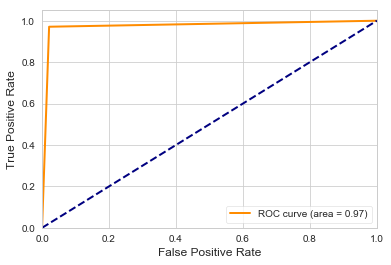

In [79]:
leader_board_logistic.show_roc_curve('V1')

#### Observation 12:
1. AUC is 0.97 which shows that the model is fitting quite good.

Simlarly we create models by selecting other variables

In [80]:
df_logistic = df_linear.copy(deep=True)
mean_price = df_logistic.price.mean()
df_logistic.loc[df_logistic.price <= mean_price,'price'] = 0
df_logistic.loc[df_logistic.price > mean_price,'price'] = 1
df_logistic.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,0.0,0,3.95,3.98,2.43
2,0.21,4,6,3,59.8,1.0,0,3.89,3.84,2.31
3,0.23,2,6,5,56.9,1.0,0,4.05,4.07,2.31
4,0.29,4,2,4,62.4,1.0,0,4.20,4.23,2.63
5,0.31,2,1,2,63.3,1.0,0,4.34,4.35,2.75


Creating a model with all the independent variables

In [81]:
leader_board_logistic.add_model(
    get_log_reg_model(df_logistic,0.75,0,1500,'V2','price',
                      [i for i in df_logistic.loc[:, ~df_logistic.columns.isin(['price'])].columns.values]))

AUC: 0.966821033797028


In [82]:
leader_board_logistic.cross_val_train('V2',5,df_logistic_enc,1500)

0.96761105900888

In [83]:
leader_board_logistic.get_model_summary('V2')

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  price   No. Observations:                13485
Model:                          Logit   Df Residuals:                    13476
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.8691
Time:                        23:10:31   Log-Likelihood:                -1156.3
converged:                       True   LL-Null:                       -8835.5
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
carat         35.9071      1.430     25.117      0.000      33.105      38.709
cut            0.4051      0.055      7.365      0.000       0.297       0.513
color          0.7822      0.040     19.508      0.000       0.704       0.861
clarity        1.3227      0.056     23.426      0.000       1.212       1.433
depth         -0.3385      0.027    -12.635      0.000      -0.391      -0.286
table         -0.2115      0.120     -1.766      0.077      -0.446       0.023
x             -4.6943      0.367    -12.786      0.000      -5.414      -3.975
y              0.1032      0.083      1.239      0.215      -0.060       0.266
z              1.8695      0.400      4.675      0.000       1.086       2.653
==============================================================================

Possibly complete quasi-separation: A fraction 0.49 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [84]:
print(leader_board_logistic.get_confussion_metrics('V2'))

[[25024   671]
 [  594 14166]]


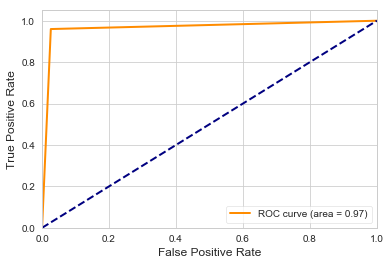

In [85]:
leader_board_logistic.show_roc_curve('V2')

#### Observation 13:
1. The model V2 has y and table with the p value greated than 0.05 

Creating model V3 by removig y and table

In [86]:
leader_board_logistic.add_model(
    get_log_reg_model(df_logistic,0.75,0,1500,'V3','price',
                      [i for i in df_logistic.loc[:, ~df_logistic.columns.isin(['price','y','table'])].columns.values]))

AUC: 0.9667194077807678


In [87]:
leader_board_logistic.cross_val_train('V3',5,df_logistic_enc,1500)

0.9668029710728276

In [88]:
leader_board_logistic.get_model_summary('V3')

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  price   No. Observations:                13485
Model:                          Logit   Df Residuals:                    13478
Method:                           MLE   Df Model:                            6
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.8689
Time:                        23:10:36   Log-Likelihood:                -1158.4
converged:                       True   LL-Null:                       -8835.5
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
carat         35.9342      1.429     25.150      0.000      33.134      38.735
cut            0.4386      0.051      8.542      0.000       0.338       0.539
color          0.7824      0.040     19.527      0.000       0.704       0.861
clarity        1.3245      0.056     23.489      0.000       1.214       1.435
depth         -0.3355      0.027    -12.551      0.000      -0.388      -0.283
x             -4.7388      0.349    -13.576      0.000      -5.423      -4.055
z              1.9908      0.414      4.807      0.000       1.179       2.803
==============================================================================

Possibly complete quasi-separation: A fraction 0.49 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

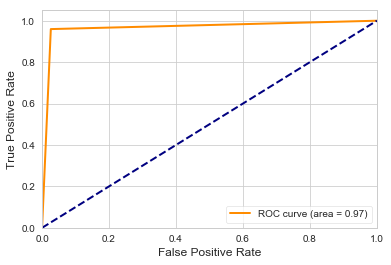

In [89]:
leader_board_logistic.show_roc_curve('V3')

Lets compare the models so far

In [90]:
leader_board_logistic.show_comparison()

Model Name,AUC
V1,0.9748371167480181
V2,0.96761105900888
V3,0.9668029710728276


## Regularization

Importing Lasso and Ridge modules

In [91]:
from sklearn.linear_model import Lasso, Ridge

Creating a Lasso regression model and tesing it for various valus of alpha from 0.1 to 50

We also look at the trained and the cross validated values for the lasso regression

In [92]:
print('Lasso Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.01,50,50)
t_rmse = np.array([])
cv_rmse = np.array([])

min_lasso = {'rmse':0.0}

for a in alpha:
    lasso = Lasso(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    
    X = df_linear.loc[:,df_linear.columns != str('price')] 
    y = df_linear['price']

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.75,random_state =1)

    
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    err = y_pred-y_test    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))
    if min_lasso['rmse'] >= rmse_train or min_lasso['rmse'] == 0:
        min_lasso['rmse'] = rmse_train
        min_lasso['model'] = lasso
        min_lasso['pred_y'] = y_pred
        min_lasso['test_y'] = y_test
    # computing RMSE using 5-fold cross validation
    
    kf = KFold(n_splits=5, random_state=4, shuffle=True)
    xval_err = 0
    for train,test in kf.split(df_linear):
        X_train, y_train = X.iloc[train], y.iloc[train]
        X_test, y_test = X.iloc[test], y.iloc[test]
        reg = Lasso(fit_intercept=True, alpha=a)
        reg.fit(X_train,y_train)
        pred_y = reg.predict(X_test)
        err = pred_y - y_test
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

Lasso Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 1213.4533		 1218.8574
1.030	 1212.4318		 1218.3441
2.050	 1212.7004		 1218.3620
3.071	 1213.2569		 1218.7821
4.091	 1213.9383		 1219.4030
5.111	 1214.7518		 1220.2073
6.131	 1215.6828		 1221.1739
7.151	 1216.7423		 1222.3059
8.172	 1217.9212		 1223.6097
9.192	 1219.2156		 1225.0856
10.212	 1220.6387		 1226.7310
11.232	 1222.1646		 1228.5475
12.252	 1223.8227		 1230.5306
13.273	 1225.5911		 1232.6888
14.293	 1227.4813		 1234.8119
15.313	 1228.8888		 1235.5215
16.333	 1228.9448		 1235.6492
17.353	 1229.0112		 1235.7862
18.374	 1229.0845		 1235.9318
19.394	 1229.1675		 1236.0853
20.414	 1229.2587		 1236.2466
21.434	 1229.3565		 1236.4164
22.454	 1229.4641		 1236.5947
23.475	 1229.5799		 1236.7815
24.495	 1229.7038		 1236.9762
25.515	 1229.8358		 1237.1805
26.535	 1229.9772		 1237.3912
27.556	 1230.1254		 1237.6111
28.576	 1230.2827		 1237.8391
29.596	 1230.4479		 1238.0754
30.616	 1230.6219		 1238.3199
31.636	 1230.8040		 1238.5725
32.65

Below is the plot to visualize the RMSE for Trained and the cross validated with various alpha values 

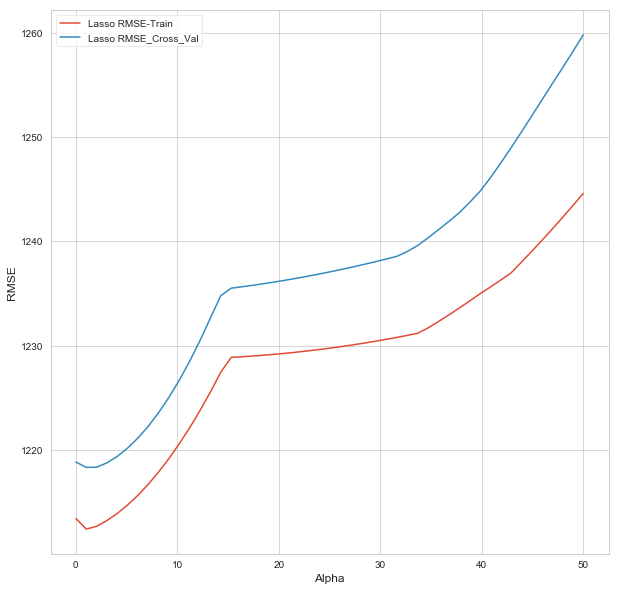

In [93]:
plt.rcParams['figure.figsize'] = 10, 10
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
plt.legend( ('Lasso RMSE-Train', 'Lasso RMSE_Cross_Val') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()

Comparing the lasso regression model with the linear V4 model

Below is the Minimum RMSE

In [94]:
min_lasso['rmse']

1212.431823666921

Here is the true y Vs the predicted y
We can see a slight change in the predictions

Text(0, 0.5, 'Predictions')

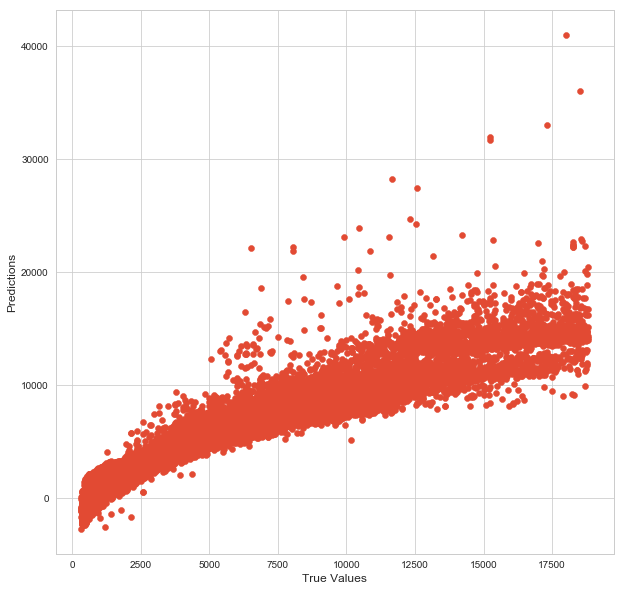

In [95]:
plt.scatter(min_lasso['test_y'], min_lasso['pred_y'])
plt.xlabel('True Values')
plt.ylabel('Predictions')

Below in the smae graph for the normal Linear regression model

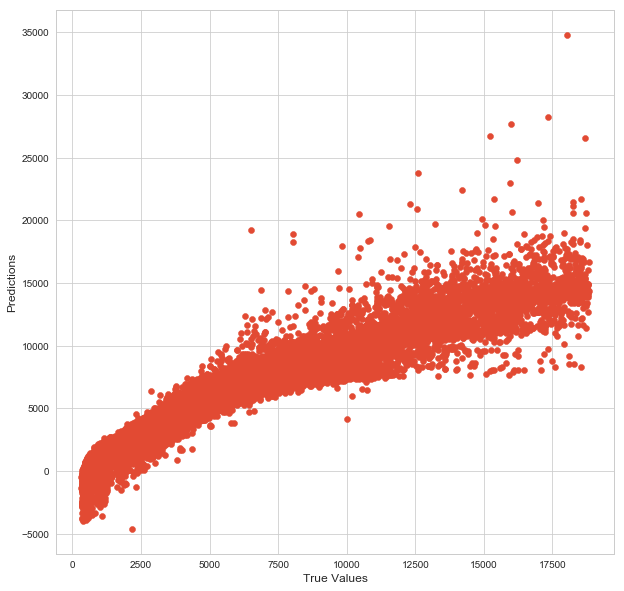

In [96]:
leader_board.get_pred_vs_actual('V4')

#### Observation 14:
1. For lasso the predicted values seem to be slightly linear as compared to the normal model

## Conclusion

Observation 1, 2, 3, 4 suggest that Carat, Clarity,  Color are highly significant. This is to say that these independent variables have strong positive relation with the price. This makes the model highly interpretable.<br/>
Observation 7 suggests that the errors are normaly distributed and we have visualized then with the help of distribution plots.<br/>
Observation 8 suggests that the variance is some what same for the predictors for various models. but is not a perfect fit to the quantile line.<br/>
Observation 10 suggests that the interaction effect does not have much of synerfgistic effect.<br/>
Observations 12, 13 show the AUC and ROC curves for Logistic Regression which has a good AUC suggesting that the model is a good fit for classifying the High and Low prices<br/>
Observation 14 Compares the Lasso with the non regularized regression

## Contributions 

1. Code contributed by me ~ 90% code
2. From other sources ~ 10% code

## Citations

1. Linear Regression in Python using scikit-learn [Link](http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/)
2. Statsmodels’s Documentation [Link](https://www.statsmodels.org/stable/index.html)
3. Linear Regression [Link](https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Linear_Regression.ipynb)
4. Emulating R regression plots in Python [Link](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034)
5. Statsmodels qqplot [Link](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html)
6. Dataset Details [Link](https://vincentarelbundock.github.io/Rdatasets/doc/ggplot2/diamonds.html)

## License

<div class="alert alert-block alert-info">
MIT License
<br><br>
Copyright (c) 2019 Ninad Subhedar
<br><br>
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
<br><br>
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
<br><br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</div>